In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = 'data/BMP_Multi/'
sz = 60
arch=resnet50
bs = 64

In [4]:
label_csv = f'{PATH}bmp_test.csv'

In [5]:
BMPS = 'train'

In [6]:
tfms = tfms_from_model(arch, sz, crop_type=CropType.NO)
data = ImageClassifierData.from_csv(PATH,BMPS, label_csv, tfms=tfms, bs=bs)

In [7]:
#Set aside cross validation of 20%
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
fn = PATH + data.trn_ds.fnames[0]; fn

'data/BMP_Multi/train/AC_I0000007.bmp'

In [9]:
fns_trn = [PATH + i for i in data.trn_ds.fnames]; fns_trn

['data/BMP_Multi/train/AC_I0000007.bmp',
 'data/BMP_Multi/train/AC_I0000008 (2).bmp',
 'data/BMP_Multi/train/AC_I0000008.bmp',
 'data/BMP_Multi/train/AC_I0000009 (2).bmp',
 'data/BMP_Multi/train/AC_I0000009.bmp',
 'data/BMP_Multi/train/AC_I0000010 (2).bmp',
 'data/BMP_Multi/train/AC_I0000010.bmp',
 'data/BMP_Multi/train/AC_I0000011.bmp',
 'data/BMP_Multi/train/AC_I0000012 (2).bmp',
 'data/BMP_Multi/train/AC_I0000012.bmp',
 'data/BMP_Multi/train/AC_I0000013 (2).bmp',
 'data/BMP_Multi/train/AC_I0000013.bmp',
 'data/BMP_Multi/train/AC_I0000014.bmp',
 'data/BMP_Multi/train/AC_I0000015.bmp',
 'data/BMP_Multi/train/AC_I0000016.bmp',
 'data/BMP_Multi/train/AC_I0000017.bmp',
 'data/BMP_Multi/train/AC_I0000018 (2).bmp',
 'data/BMP_Multi/train/AC_I0000018.bmp',
 'data/BMP_Multi/train/AC_I0000019.bmp',
 'data/BMP_Multi/train/AC_I0000028.bmp',
 'data/BMP_Multi/train/AC_I0000029.bmp',
 'data/BMP_Multi/train/AC_I0000030.bmp',
 'data/BMP_Multi/train/AC_I0000032 (2).bmp',
 'data/BMP_Multi/train/AC_I00

aug_tfms = RandomRotate(90, p=0.75, mode=cv2.BORDER_REFLECT, tfm_y=TfmType.NO), 
RandomLighting(b=0.5, c=0, tfm_y=TfmType.NO)

In [10]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms = [RandomRotate(90, p=0.75, mode=cv2.BORDER_REFLECT, tfm_y=TfmType.NO), 
RandomLighting(b=0.5, c=0, tfm_y=TfmType.NO)], max_zoom = 1.5, crop_type =CropType.NO)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, num_workers=4, val_idxs=val_idxs, tfms=tfms, bs=bs, test_name='test')
    return data

# train

In [11]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 14, cycle_len=1)

100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


epoch      trn_loss   val_loss   accuracy                
    0      0.939887   0.397969   0.904321  
    1      0.553438   0.279141   0.925926                  
    2      0.398051   0.213891   0.938272                 
    3      0.316952   0.163826   0.95679                   
    4      0.260691   0.147551   0.959877                  
    5      0.220451   0.136582   0.959877                 
    6      0.185475   0.163621   0.95679                  
    7      0.173191   0.125911   0.975309                 
    8      0.155154   0.103003   0.969136                 
    9      0.143808   0.127859   0.962963                 
    10     0.128728   0.144669   0.972222                 
    11     0.124258   0.098147   0.984568                 
    12     0.113445   0.100578   0.984568                 
    13     0.108402   0.0983     0.975309                 



[array([0.0983]), 0.9753086419753086]

In [12]:
learn.save('224_bmp_pre')
learn.load('224_bmp_pre')

In [13]:
data = get_data(224,bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 5, cycle_len=1, cycle_mult= 2)

100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


epoch      trn_loss   val_loss   accuracy                  
    0      0.856631   0.380603   0.891975  
    1      0.46749    0.206945   0.941358                 
    2      0.342604   0.221861   0.947531                 
    3      0.262618   0.152841   0.962963                 
    4      0.20901    0.201063   0.95679                  
    5      0.184693   0.143123   0.962963                 
    6      0.163515   0.145962   0.966049                 
    7      0.143502   0.163508   0.966049                 
    8      0.137443   0.126956   0.972222                 
    9      0.125393   0.164105   0.975309                 
    10     0.116605   0.161788   0.972222                 
    11     0.102163   0.133754   0.978395                 
    12     0.084339   0.120232   0.978395                  
    13     0.091731   0.119454   0.978395                  
    14     0.082029   0.140479   0.978395                  
    15     0.075465   0.121904   0.978395                  
    16 

[array([0.13037]), 0.9753086419753086]

In [14]:
learn.save('224_bmp_post')
learn.load('224_bmp_post')

# Exploring Validation 

In [15]:
log_preds = learn.predict()
probs = np.exp(log_preds)
probs.shape

(324, 9)

In [16]:
fns_val = [PATH + i for i in data.val_ds.fnames]; fns_val

['data/BMP_Multi/train/AC_I0000017 (2).bmp',
 'data/BMP_Multi/train/AC_I0000031.bmp',
 'data/BMP_Multi/train/AC_I0000034 (2).bmp',
 'data/BMP_Multi/train/AC_I0000034.bmp',
 'data/BMP_Multi/train/AC_I0000035.bmp',
 'data/BMP_Multi/train/AC_I0000040.bmp',
 'data/BMP_Multi/train/AC_I0000043.bmp',
 'data/BMP_Multi/train/AC_I0000062.bmp',
 'data/BMP_Multi/train/AC_I0000064.bmp',
 'data/BMP_Multi/train/AC_I0000071.bmp',
 'data/BMP_Multi/train/AC_I0000073 (2).bmp',
 'data/BMP_Multi/train/AC_I0000075 (2).bmp',
 'data/BMP_Multi/train/AC_I0000085.bmp',
 'data/BMP_Multi/train/AC_I0000087.bmp',
 'data/BMP_Multi/train/AC_I0000096.bmp',
 'data/BMP_Multi/train/AC_I0000097.bmp',
 'data/BMP_Multi/train/AC_I0000099 (2).bmp',
 'data/BMP_Multi/train/AC_I0000100 (2).bmp',
 'data/BMP_Multi/train/AC_I0000101 (2).bmp',
 'data/BMP_Multi/train/AC_I0000126.bmp',
 'data/BMP_Multi/train/AC_I0000127.bmp',
 'data/BMP_Multi/train/AC_I0000128.bmp',
 'data/BMP_Multi/train/AC_I0000143.bmp',
 'data/BMP_Multi/train/AC_I00

In [17]:
df_data = []
for prob, val_y, fn in zip(probs, data.val_y, fns_val):
    df_data.append({"BestProp": prob.max(), "BestProbClass": prob.argmax(), "Actual": val_y, "Filename": fn})
df = pd.DataFrame(df_data)
df.columns, df.index

(Index(['Actual', 'BestProbClass', 'BestProp', 'Filename'], dtype='object'),
 RangeIndex(start=0, stop=324, step=1))

In [18]:
df.to_csv(PATH + 'val_prob.csv')

In [19]:
(df['Actual'] == df['BestProbClass']).describe()

count      324
unique       2
top       True
freq       317
dtype: object

In [20]:
imr = ImageModelResults(data.val_ds, log_preds)

In [21]:
data.classes

['AC',
 'Color',
 'Femur',
 'HC',
 'Quad',
 'RCL',
 'Solo3d',
 'Text_box',
 'Wavelength']

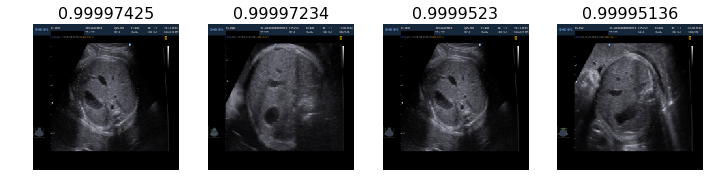

In [22]:
imr.plot_most_correct(0)

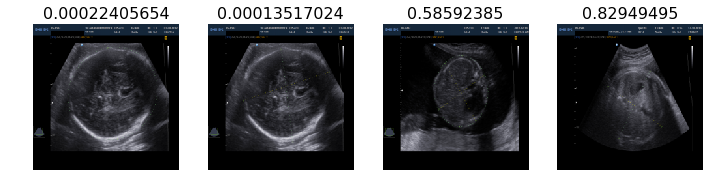

In [23]:
imr.plot_most_uncertain(0)

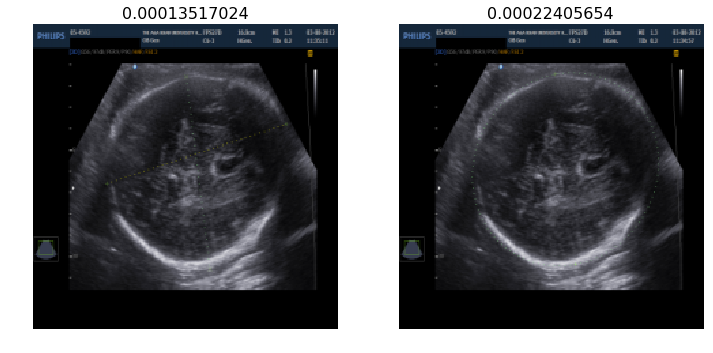

In [24]:
imr.plot_most_incorrect(0)

# Exploring test Set

In [29]:
log_testpreds = learn.predict(is_test=True)
probs_test = np.exp(log_testpreds)
probs_test.shape

(427, 9)

In [31]:
fns_test = [PATH + i for i in data.test_ds.fnames]; fns_test

['data/BMP_Multi/test/I0001059.bmp',
 'data/BMP_Multi/test/I0000488.bmp',
 'data/BMP_Multi/test/I0000621.bmp',
 'data/BMP_Multi/test/I0001066.bmp',
 'data/BMP_Multi/test/I0000576.bmp',
 'data/BMP_Multi/test/I0000916.bmp',
 'data/BMP_Multi/test/I0000993.bmp',
 'data/BMP_Multi/test/I0001005.bmp',
 'data/BMP_Multi/test/I0001019.bmp',
 'data/BMP_Multi/test/I0000991.bmp',
 'data/BMP_Multi/test/I0000498.bmp',
 'data/BMP_Multi/test/I0001568.bmp',
 'data/BMP_Multi/test/I0000984.bmp',
 'data/BMP_Multi/test/I0001009 (2).bmp',
 'data/BMP_Multi/test/I0000949.bmp',
 'data/BMP_Multi/test/I0001023.bmp',
 'data/BMP_Multi/test/I0000913.bmp',
 'data/BMP_Multi/test/I0001022.bmp',
 'data/BMP_Multi/test/I0001061.bmp',
 'data/BMP_Multi/test/I0000933.bmp',
 'data/BMP_Multi/test/I0000951.bmp',
 'data/BMP_Multi/test/I0000651.bmp',
 'data/BMP_Multi/test/I0000591.bmp',
 'data/BMP_Multi/test/I0000990.bmp',
 'data/BMP_Multi/test/I0003040.bmp',
 'data/BMP_Multi/test/I0000590.bmp',
 'data/BMP_Multi/test/I0000581.bmp

In [37]:
df_data = []
for prob, val_y, fn in zip(probs_test, data.val_y, fns_test):
    df_data.append({"BestProp": prob.max(), "BestProbClass": prob.argmax(), "Actual": val_y, "Filename": fn})
df = pd.DataFrame(df_data)
df.columns, df.index

(Index(['Actual', 'BestProbClass', 'BestProp', 'Filename'], dtype='object'),
 RangeIndex(start=0, stop=324, step=1))

In [38]:
df.to_csv('data/BMP_Multi/testtruth.csv')